# **Classification of Documents Using Graph-Based Features and KNN**

## **1. Data Collection and Preparation:**
Collect or create 15 pages of text for each of the three assigned topics, ensuring each
page contains approximately 500 words.

Import necessary libraries

In [70]:
import os
import csv
import pandas as pd

Read the data from the files

In [71]:
# File Paths
food_csv_file_path  = 'articles/food_articles.csv'
disease_csv_file_path  = 'articles/disease_articles.csv'
science_csv_file_path  = 'articles/science_articles.csv'

# Read the data
food_articles = pd.read_csv(food_csv_file_path )
disease_articles = pd.read_csv(disease_csv_file_path )
science_articles = pd.read_csv(science_csv_file_path )

# Display the shape of the data
print(food_articles.shape)
print(disease_articles.shape)
print(science_articles.shape)

# Display the columns of the data
print(food_articles.columns)

# Display the first few rows of the data
print(food_articles.head())

(15, 5)
(15, 5)
(15, 5)
Index(['label', 'title', 'link', 'body', 'words_count'], dtype='object')
  label                                              title  \
0  Food  How to Eat Healthy When Your Partner Doesn't W...   
1  Food  Up, Up and Away! Pack These Nutrition Tips Nex...   
2  Food  The Chef's Take: Grains and Egg Bowl from Cami...   
3  Food       Is Sweet Potato Toast the New Avocado Toast?   
4  Food                         Are You a Healthy Snacker?   

                                                link  \
0  https://www.foodnetwork.com/healthyeats/health...   
1  https://www.foodnetwork.com/healthyeats/health...   
2  https://www.foodnetwork.com/healthyeats/restau...   
3  https://www.foodnetwork.com/healthyeats/2017/0...   
4  https://www.foodnetwork.com/healthyeats/2017/0...   

                                                body  words_count  
0  The people you’re surrounded by can play a sig...          618  
1  Whether you're traveling home for the holidays...     

Divide the dataset into a training set (12 pages per topic) and a test set (3 pages per 
topic).

In [72]:
# Divide each dataset into training and test sets
train_food = food_articles[:12]
test_food = food_articles[12:15]

train_disease = disease_articles[:12]
test_disease = disease_articles[12:15]

train_science = science_articles[:12]
test_science = science_articles[12:15]

Concatinating all topics data

In [73]:
# Concatenate the training and test sets for each topic
train_set = pd.concat([train_food, train_disease, train_science], ignore_index=True)
test_set = pd.concat([test_food, test_disease, test_science], ignore_index=True)

# Print the number of articles in each set
print("Training set size:", len(train_set))
print("Test set size:", len(test_set))

Training set size: 36
Test set size: 9


## **2. Preprocessing**
Preprocessing such as tokenization, stop-word removal, and stemming

In [74]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#### *Tokenization:*
* Tokenization is the process of breaking down a text or sentence into individual words or tokens.
* The nltk.word_tokenize() function from the Natural Language Toolkit (NLTK) library is used to tokenize the text.
* str(text).lower() is used to convert the text to lowercase before tokenization, ensuring that the tokenization process treats words with the same spelling but different cases (e.g., "Word" and "word") as identical.

#### *Stop-word removal:*
* Stop words are common words like "the", "is", "and", etc., that are often filtered out because they typically do not carry significant meaning for text analysis.
* The NLTK library provides a list of English stop words through the stopwords.words('english') function.
* The list of tokens is filtered using a list comprehension to exclude tokens that appear in the stop words list.

#### *Stemming:*
* Stemming is the process of reducing words to their root or base form, which helps in reducing the dimensionality of the feature space and improving computational efficiency.
* The PorterStemmer() from the NLTK library is used to perform stemming.
* Each token in the list is stemmed using a list comprehension to create a list of stemmed tokens.

In [75]:
# Tokenization
def tokenize(text):
    return nltk.word_tokenize(str(text).lower())

# Stop-word removal
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

# Stemming
def stem_tokens(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

Preprocessing such as tokenization, stop-word removal, and stemming

In [76]:
# Preprocess train dataset
preprocessed_train_set = []
for index, row in train_set.iterrows():  # Iterate over each row in the training set DataFrame
    title_tokens = tokenize(row['title'])  # Access the 'title' column of the current row
    body_tokens = tokenize(row['body'])    # Access the 'body' column of the current row

    title_tokens = remove_stopwords(title_tokens)
    body_tokens = remove_stopwords(body_tokens)

    title_tokens = stem_tokens(title_tokens)
    body_tokens = stem_tokens(body_tokens)

    words_count = len(body_tokens) # words count after Preprocessing
    
    preprocessed_train_set.append({'label': row['label'], 'title_tokens': title_tokens, 'body_tokens': body_tokens, 'words_count': words_count})


# Print preprocessed train dataset
for index, article in enumerate(preprocessed_train_set):
    print(f"Article: {index + 1}")
    print(f"Label: {article['label']}")
    print(f"Title Tokens: {article['title_tokens']}")
    print(f"Body Tokens: {article['body_tokens']}")
    print(f"Words Count: {article['words_count']}")
    print()

Article: 1
Label: Food
Title Tokens: ['eat', 'healthi', 'partner', "n't", 'want']
Body Tokens: ['peopl', '’', 'surround', 'play', 'signific', 'role', 'food', 'choic', '.', 'especi', 'case', 'signific', ',', '’', 'like', 'share', 'lot', 'meal', 'time', 'togeth', '.', 'eat', 'habit', '’', 'align', ',', 'may', 'end', 'cook', 'complet', 'differ', 'meal', 'order', 'differ', 'place', '.', 'someth', 'meant', 'fun', ',', 'like', 'go', 'brunch', ',', 'start', 'becom', 'stress', 'partner', '’', 'open', 'new', 'way', 'eat', '.', '’', 'mani', 'client', 'motiv', 'eat', 'healthier', 'tri', 'everyth', 'get', 'partner', 'onboard', '.', 'oftentim', ',', 'result', 'tension', 'argument', '’', 'open', 'commun', 'person', 'come', '.', 'strategi', '’', 'use', 'nutrit', 'practic', 'may', 'help', 'navig', 'partner', '.', 'pushi', 'usual', '’', 'work', '.', 'person', ',', '’', 'ok', 'want', 'thing', 'partner', ',', 'even', 'think', '’', 'good', '.', 'get', 'close', 'someon', ',', 'realli', 'excit', 'share', 'a

## **3. Graph Construction:**
Representing each page as a directed graph where nodes represent unique terms = (words), (around 300 words, after preprocessing) and edges denote term relationships based on their sequence in the text

In [77]:
import networkx as nx
import matplotlib.pyplot as plt

Function to create the directed graph

In [78]:
# Function to build directed graph
def build_graph(tokens):
    graph = nx.DiGraph()
    for i in range(len(tokens) - 1):
        if not graph.has_edge(tokens[i], tokens[i+1]):
            graph.add_edge(tokens[i], tokens[i+1], weight=1)
        else:
            graph.edges[tokens[i], tokens[i+1]]['weight'] += 1
    return graph

In [79]:
# Function to construct directed graph
def construct_graph(tokens):
    graph = nx.DiGraph()
    # Add nodes
    for i, token in enumerate(tokens):
        graph.add_node(token)
        if i > 0:
            # Add directed edge from previous token to current token
            graph.add_edge(tokens[i-1], token)
    return graph

Function to plot directed graph using matplotlib library

In [80]:
# Function to plot the graph
def plot_graph(graph):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='black', linewidths=1, font_size=10)
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
    plt.show()

Article :  1 Label:  Food Graph built
Article :  2 Label:  Food Graph built
Article :  3 Label:  Food Graph built
Article :  4 Label:  Food Graph built
Article :  5 Label:  Food Graph built
Article :  6 Label:  Food Graph built
Article :  7 Label:  Food Graph built
Article :  8 Label:  Food Graph built
Article :  9 Label:  Food Graph built
Article :  10 Label:  Food Graph built
Article :  11 Label:  Food Graph built
Article :  12 Label:  Food Graph built
Article :  13 Label:  Diseases/ Symptoms Graph built
Article :  14 Label:  Diseases/ Symptoms Graph built
Article :  15 Label:  Diseases/ Symptoms Graph built
Article :  16 Label:  Diseases/ Symptoms Graph built
Article :  17 Label:  Diseases/ Symptoms Graph built
Article :  18 Label:  Diseases/ Symptoms Graph built
Article :  19 Label:  Diseases/ Symptoms Graph built
Article :  20 Label:  Diseases/ Symptoms Graph built
Article :  21 Label:  Diseases/ Symptoms Graph built
Article :  22 Label:  Diseases/ Symptoms Graph built
Article :  

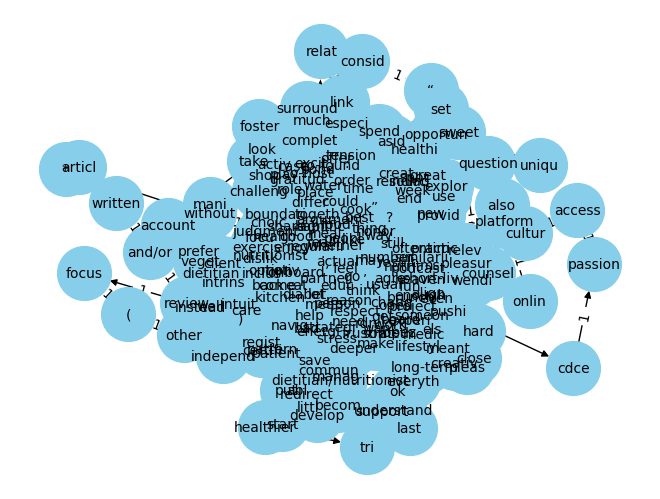

In [81]:
graphs_train_set = []
for index, article in enumerate(preprocessed_train_set):
    # Build the directed graph
    print("Article : ", index+1, "Label: ", article['label'], "Graph built")
    graph = build_graph(article['body_tokens'])
    graphs_train_set.append(graph)

    # Plot the graph
    # plot_graph(graph)

# Plot the first graph in the training set
print("Graph of the first article in the training set")
plot_graph(graphs_train_set[0])


## **4. Graph Representation:**

Creativity in graph representation. It automatically visulize graph in the browserin attractive form.

In [82]:
# Import Gravis
import gravis as gv

# Display the first graph in the training set using Gravis
graph = graphs_train_set[0]
gv.d3(graph).display() 

## **5. KNN Classifier:**
Implementation of the KNN using a distance measure based on the maximal common subgraph (MCS) between document graphs. This involves computing the similarity between graphs by evaluating their shared structure, as indicated by the MCS.

In [83]:
import networkx as nx
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

This function computes the distance maximal common subgraph (MCS) between two input graphs `graph1` and `graph2`

In [84]:
# Function to compute MCS between two graphs
def compute_mcs(graph1, graph2):
    # Extract the set of edges from each graph
    edges1 = set(graph1.edges())
    edges2 = set(graph2.edges())
    
    # Compute the set of common edges between the two graphs
    common_edges = edges1.intersection(edges2)
    
    # Construct a new graph using the common edges, representing the maximal common subgraph
    mcs_graph = nx.Graph(list(common_edges))
    
    # Calculate the graph distance (negative size of the maximal common subgraph)
    distance = len(mcs_graph.edges())
    
    return distance

Formula to compute distance

**`d(G1, G2) = 1 - (| mcs(G1, G2) | / max(| len(G1) |, | len(G2) |))`**

* *`d(G1, G2)`*                     : Represents the distance between graphs G1 and G2.
* *`mcs(G1, G2)`*                   : Denotes the maximal common subgraph between graphs G1 and G2.
* *`| mcs(G1, G2) |`*               : Refers to the size (number of edges) of the maximal common subgraph.
* *`| len(G1) | and | len(G2) |`*   : Represent the number of edges in graphs G1 and G2, respectively.
* *`max(| len(G1) |, | len(G2) |)`* : Finds the maximum number of edges between the two graphs.
* *`1 - (...)`*                     : Calculates the normalized distance between 0 and 1 based on the size of the maximal common subgraph relative to the maximum number of edges in the input graphs.

In [85]:
# Function to compute distances between test graph and all training graphs
def compute_distances(test_graph, training_graphs):
    distances = []
    for training_graph in training_graphs:
        mcs = compute_mcs(test_graph, training_graph)
        # Convert MCS to a distance measure and normalize
        distance = 1 - (mcs / max(len(test_graph.edges()), len(training_graph.edges())))
        distances.append(distance)
    return distances

Function to predict the label

In [86]:
# Implement the KNN Classifier
training_labels = train_set['label'].tolist() # Get the labels of the training set
k = 2 # Number of neighbors to consider

# Function to predict the label of a graph
def predict(graph):
    distances = []

    # Compute the distance between the input graph and all training graphs
    distances = compute_distances(graph, graphs_train_set)

    # Get the indices of the k-nearest neighbors
    nearest_indices = sorted(range(len(distances)), key=lambda i: distances[i])[:k]
    nearest_labels = [training_labels[i] for i in nearest_indices] # Get the labels of the k-nearest neighbors
    prediction = max(set(nearest_labels), key=nearest_labels.count) # Get the most common label
    return prediction

## **6. Classification with KNN:**
Classifing the test documents based on the majority class of their k-nearest neighbors in the feature space created by common subgraphs.

In [87]:
# Preprocess test dataset
preprocessed_test_set = []
for index, row in test_set.iterrows():
    title_tokens = tokenize(row['title'])
    body_tokens = tokenize(row['body'])
    
    title_tokens = remove_stopwords(title_tokens)
    body_tokens = remove_stopwords(body_tokens)
    
    title_tokens = stem_tokens(title_tokens)
    body_tokens = stem_tokens(body_tokens)
    
    words_count = len(body_tokens)
    
    preprocessed_test_set.append({'label': row['label'], 'title_tokens': title_tokens, 'body_tokens': body_tokens, 'words_count': words_count})

In [88]:
# Print preprocessed test dataset
for article in preprocessed_test_set:
    print(f"Label: {article['label']}")
    print(f"Title Tokens: {article['title_tokens']}")
    print(f"Body Tokens: {article['body_tokens']}")
    print(f"Words Count: {article['words_count']}")
    print()

Label: Food
Title Tokens: ['6', '``', 'healthi', "''", 'kid', 'snack', '’']
Body Tokens: ['feed', 'kid', 'get', 'confus', '.', 'pushi', 'food', 'market', 'bewild', 'label', ',', '’', 'wonder', 'folk', 'misl', 'kid', 'snack', 'realli', 'healthi', '.', "'s", 'real', 'deal', "'ve", 'buy', '.', '#', '1', ':', 'yogurt', 'cow', '’', 'make', 'purpl', ',', 'hot', 'pink', 'even', 'blue-color', 'yogurt', '—', '’', 'tell', 'kid', 'everi', 'time', 'hit', 'dairi', 'aisl', '.', 'neon', 'yogurt', 'load', 'sugar', '(', 'includ', 'infam', 'high', 'fructos', 'corn', 'syrup', ')', 'lot', 'addit', 'preserv', "n't", 'favor', 'littl', 'bodi', '.', 'give', 'kid', 'punch', 'calcium', 'protein', 'healthier', 'dairi', 'product', '.', 'kid', 'pine', 'yogurt', ',', 'healthier', 'option', ':', 'stonyfield', 'yo', 'babi', ',', 'yo', 'kid', 'fat-fre', 'organ', '(', 'french', 'vanilla', '5-year-old', "'s", 'fave', ')', 'low-fat', 'brown', 'cow', 'yogurtchobani', 'champion', 'greek', 'yogurt', '#', '2', ':', 'granola'

Article :  1 Graph built
Article :  2 Graph built
Article :  3 Graph built
Article :  4 Graph built
Article :  5 Graph built
Article :  6 Graph built
Article :  7 Graph built
Article :  8 Graph built
Article :  9 Graph built
Graph of the first article in the testing set


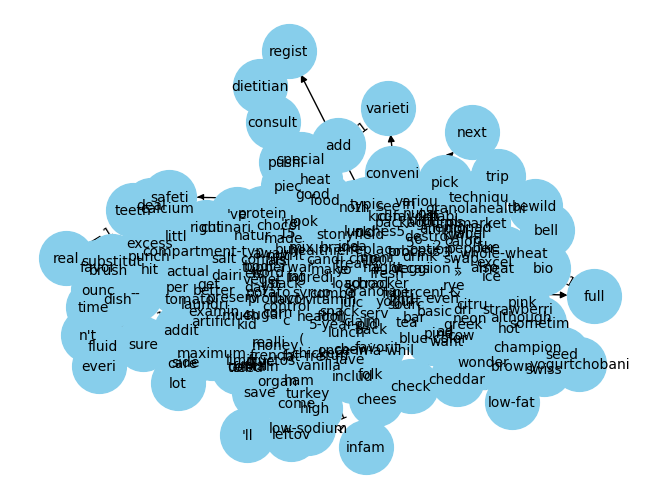

In [89]:
# Construct graphs for the test set
graphs_test_set = []
for index, article in enumerate(preprocessed_test_set):
    # Build the directed graph
    print("Article : ", index+1, "Graph built")
    graph = build_graph(article['body_tokens'])
    graphs_test_set.append(graph)

    # Plot the graph
    # plot_graph(graph)

# Plot the first graph in the training set
print("Graph of the first article in the testing set")
plot_graph(graphs_test_set[0])

Predicting the labels of the test graphs

In [90]:
# Predict the labels of the test graphs
predicted_labels = []
for test_graph in graphs_test_set:
    # predicted_label = predict_label(test_graph, classifier)
    predicted_label = predict(test_graph)
    predicted_labels.append(predicted_label)

## **7. Evaluation:**
Assessing the performance of classification system using metrics such as accuracy, precision, recall, and F1-score and by ploting confusion matrix.

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Predicted Labels vs Actual Labels:
Predicted: Food, Actual: Food
Predicted: Food, Actual: Food
Predicted: Food, Actual: Food
Predicted: Diseases/ Symptoms, Actual: Diseases/ Symptoms
Predicted: Diseases/ Symptoms, Actual: Diseases/ Symptoms
Predicted: Diseases/ Symptoms, Actual: Diseases/ Symptoms
Predicted: Science/Education, Actual: Science/Education
Predicted: Science/Education, Actual: Science/Education
Predicted: Science/Education, Actual: Science/Education

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Classification Report:
                    precision    recall  f1-score   support

Diseases/ Symptoms       1.00      1.00      1.00         3
              Food       1.00      1.00      1.00         3
 Science/Education       1.00      1.00      1.00         3

          accuracy                           1.00         9
         macro avg       1.00      1.00      1.00         9
      weighted avg       1.00      1.00      1.00         9


Confusion Matrix:


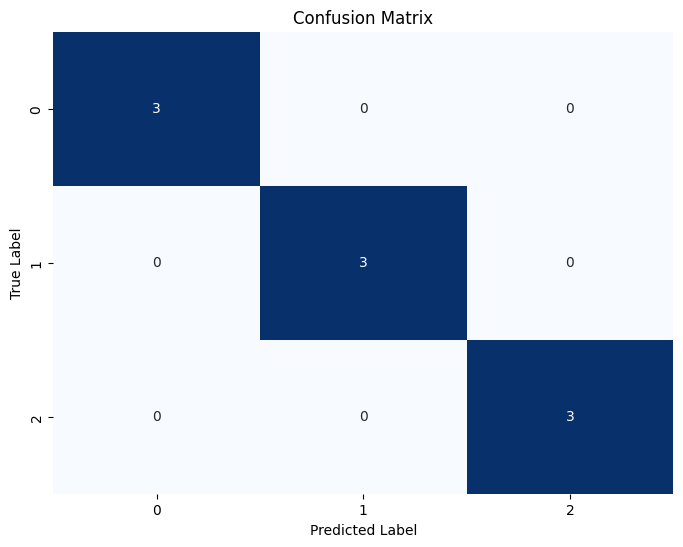

In [92]:
# Calculate evaluation metrics  
y_true = test_set['label'].tolist()
y_pred = predicted_labels

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
report = classification_report(y_true, y_pred)

# Print the predicted labels and actual labels
print("Predicted Labels vs Actual Labels:")
for i in range(len(predicted_labels)):
    print(f"Predicted: {predicted_labels[i]}, Actual: {y_true[i]}")
print()

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print()

# Print classification report
print("Classification Report:")
print(report)
print()

# Plot confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()